In [2]:
#Data importation
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
pd.set_option('display.max_row',111)

In [7]:
# WE can see the Nan values 
mask=df.isnull().any(axis=1)
df[mask]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
mask2=df.isnull().any(axis=0)
columns_with_Nan=df.columns[mask2]
df[columns_with_Nan]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [12]:
# calculer le pourcentage des lignes manquantes
mask=df.isnull().any(axis=1)
ligne_man=mask.sum()
ligne_man
pourcentage_ligne_m=ligne_man/len(df)
print("Le pourcentage des lignes manquantes est : " , pourcentage_ligne_m)

Le pourcentage des lignes manquantes est :  0.7946127946127947


In [7]:
#calculer le pourcentage des columns manquantes 
#calculer combien de missing data a chaque column 
df.isnull().sum()
poucentage_column_m=df.isnull().sum()/len(df)
print("Le pourcentage des columns avec les valeurs manquantes est : ",poucentage_column_m)

Le pourcentage des columns avec les valeurs manquantes est :  PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Gender         0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [8]:
# on remarque que le pourcentage des valeurs manquantes dans la column Cabin est grand , on peut la supprimer
data_Without_Cabin=df.drop(columns=['Cabin'])
data_Without_Cabin.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
# on calcule mtn le pourcentage des lignes qui contient les valeurs manquantes apres l elimination de column Cabin 
# le nv pourcentage est 20% avant la suppression de column Cabin le pourcentage etait 79%
mask=data_Without_Cabin.isnull().any(axis=1)
lignes_man=mask.sum()
pourcentage_lines_man=lignes_man/len(data_Without_Cabin)
print("Le nv pourcentage est : " , pourcentage_lines_man)


Le nv pourcentage est :  0.20089786756453423


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#if we want to fill  the missing values 
data_new=df.fillna(0)
data_new.head()
# on remarque que les valeurs Nan sont remplaces par 0 

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [12]:
# si on veut personnaliser chaque column par une valeur 
mask=df.isnull().any(axis=0)
df.columns[mask]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [13]:
data_new=df.fillna({'Age':10 , 'Cabin':'A', 'Embarked':'B'})
data_new.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,A,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,10.0,1,2,W./C. 6607,23.45,A,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,A,Q


In [1]:
# filling the columns with the average of each column 
# let's calcul the moyenne 
#moyenne_column=df.mean(axis=0)# au nv des colonnes 
#moyenne_column

In [15]:
# on va maintenant remplir les valeurs manquantes avec la moyenne de chaque column 
data_new=df.fillna(moyenne_column)
data_new
# on remarque que seul la case d age est remplie car il s'agit d un nombre , les autres sont Nan 

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [16]:
# Par exemple pour la colonne Embarked on va recuperer la valeur la plus frequente de cette colonne  
most_fre_value=df['Embarked'].mode()[0]
most_fre_value 
#on remarque que la valeur S est la plus frequente , donc on va remplir avec cette valeur  

'S'

In [17]:
data_f=df.fillna({'Embarked':most_fre_value})
data_f.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# nous aurons besoin ds cabines pour pouvoir savoir le max les gens qui ont une possibilite de vivre ou de mourir 
# du coup on va regrouper les noms des cabines par bloc par exemple C12 , C34 ,C78 appartient au mm bloc C ... 
#recuperons l ensemble de cabine qui existe dans notre dataset non doublon 
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [19]:
# on fait une liste de tous les blocs , le dernier element est utilise lorsqu'il n ya pas de code de cabine
cabin_list=['A','B','C','D','E','F','T','G','unkown']
#on va definir une fct qui associe a chaque code la lettre de son bloc 
def get_cabin_block(big_substring , substringlist): # get_cabin_block("A23",cabinlist)
    for substring in substringlist:
        if substring in big_substring:
            return substring 
    return substring[-1]    
# maintenat on va cree la colonne block et la remplir en parcourant chaque value of the column Cabin
df['Block']=df['Cabin'].map(lambda x : get_cabin_block(str(x),cabin_list))
# on va suppriemr la colonne cabin
df.drop('Cabin',1,inplace=True) # drop prend trois parametres : le nom de colonne a supprimer , 1 pr indiquer qu on veut supprimer la colonne et non pas seuelemnt une ligne , inplace  Le paramètre inplace permet de spécifier si la modification doit être effectuée directement sur le DataFrame data ou si un nouveau DataFrame doit être créé. Si inplace=True, la colonne est directement supprimée du DataFrame data. Si inplace=False, un nouveau DataFrame est créé sans la colonne Cabin, mais le DataFrame data original n'est pas modifié.
df
# l erreur s affiche car on a deja suprrime la colonne 

C:\Users\HP\AppData\Local\Temp\ipykernel_4760\2044506803.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Cabin',1,inplace=True) # drop prend trois parametres : le nom de colonne a supprimer , 1 pr indiquer qu on veut supprimer la colonne et nn pas seuelemnt une ligne , inplace  Le paramètre inplace permet de spécifier si la modification doit être effectuée directement sur le DataFrame data ou si un nouveau DataFrame doit être créé. Si inplace=True, la colonne est directement supprimée du DataFrame data. Si inplace=False, un nouveau DataFrame est créé sans la colonne Cabin, mais le DataFrame data original n'est pas modifié.


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,Block
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,n
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,n
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,n
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [20]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,Block
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,n
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,n
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,n
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [21]:
# le meme prob , on a avec le nom des donnes intutiles : on a besoin de savoir juste si : MR , MRS , Cap....
# une fonction qui search for MR , MRs in names and return it 

def get_Title_of_Name(string):
    import re
    regex=re.compile(r'Mr|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mrs|Countess|Dona|Mme|Ms|Miss|Mlle|Master', re.IGNORECASE)
    result=regex.search(string)
    if result!=None: # it means that there is a match 
        return (result.group().lower())
    else :
        return str(np.nan) # if it doesn t match any of the value compiled , missing value will be there 
        

In [22]:
# une chose a mentionner que on doit decoder MR , MRS , cap 
title_dictionary = {
    "capt":"Officer", 
    "col":"Officer", 
    "major":"Officer", 
    "dr":"Officer",
    "jonkheer":"Royalty",
    "rev":"Officer",
    "countess":"Royalty",
    "dona":"Royalty",
    "lady":"Royalty",
    "don":"Royalty",
    "mr":"Mr",
    "mme":"Mrs",
    "ms":"Mrs",
    "mrs":"Mrs",
    "miss":"Miss",
    "mlle":"Miss",
    "master":"Master",
    "nan":"Mr" # for the missing value , will be Mr
}

In [30]:
# maintenant on va creer la column title et on va appliquer la fonction de get_title_of_name pour chaque ligne de notre df 
# ensuite on va remplacer chaque abreviation par sa valeur capt=officer ...
df['Title']=df['Name'].apply(get_Title_of_Name) # la fct est applique a chaque case de nom et elle prend en parametre cette  case
df['Title']=df['Title'].map(title_dictionary)
df.drop('Name', 1, inplace=True)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_4760\1187714420.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Name', 1, inplace=True)


,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Block,Title
0,0,3,male,22.0,1,0,7.2500,S,n,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,Mr
2,1,3,female,26.0,0,0,7.9250,S,n,Miss
3,1,1,female,35.0,1,0,53.1000,S,C,Mr
4,0,3,male,35.0,0,0,8.0500,S,n,Mr


In [31]:
# voyons maintenant les valeurs manquantes 
df.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Block         0
Title         0
dtype: int64

In [32]:
# mode retourne la valeur la plus frequnte qui existe dans cette colonne 
df['Embarked'].mode()[0]

'S'

In [33]:
#Voir combien de C on a Combien de S on a et combien de Q 
df.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

<AxesSubplot:xlabel='Embarked'>

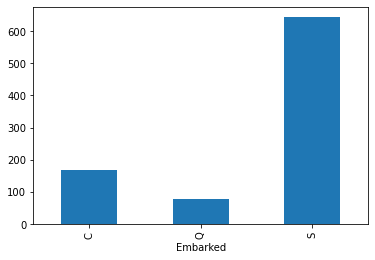

In [34]:
#sinon on peut la voir sur un graphe
import matplotlib.pyplot as plt
df.groupby('Embarked').size().plot(kind='bar')

In [35]:
# donc on peut dire que S est la plus frequnte donc on va filler les valeurs manquantes par S
df['Embarked'].fillna('S',inplace=True)
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Block,Title
0,0,3,male,22.0,1,0,7.2500,S,n,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,Mr
2,1,3,female,26.0,0,0,7.9250,S,n,Miss
3,1,1,female,35.0,1,0,53.1000,S,C,Mr
4,0,3,male,35.0,0,0,8.0500,S,n,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,n,Officer
887,1,1,female,19.0,0,0,30.0000,S,B,Miss
888,0,3,female,NaN,1,2,23.4500,S,n,Miss
889,1,1,male,26.0,0,0,30.0000,C,C,Mr


In [36]:
df.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Block         0
Title         0
dtype: int64

In [37]:
# l age est le seul parametre qu on doit regler les valeurs manquantes dedans 
# par exemple , on voit la moyenne d age qu on 
df['Age'].mean(axis=0)

29.69911764705882

In [38]:
# on voit que la moyenne d age est 29 on peut  les remplacer par la moyenne de l'âge, mais cela signifierait que certains jeunes (Maître ou Mademoiselle) sembleraient être plus âgés qu'ils ne le sont.
# Donc on va calculer la moyenne d age pour chaque title et puis remplir les valeurs manquantes suivant chaque title 
# on doit d abord calculer la moyenne de chaque colonne de title 
moyenne_age_for_each_title=df.groupby('Title')['Age'].mean(0)
moyenne_age_for_each_title

Title
Master      4.362000
Miss       21.555556
Mr         33.110656
Mrs        31.071429
Officer    38.205882
Royalty    45.666667
Name: Age, dtype: float64

In [39]:
df['Title'].unique()

array(['Mr', 'Miss', 'Master', 'Mrs', 'Royalty', 'Officer'], dtype=object)

In [40]:
# on va attribuer chaque moyenne d age a un titre exacte par exemple master : 4.36 
df['Age'].fillna(df['Title'].map(moyenne_age_for_each_title), inplace=True)
df.tail()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Block,Title
886,0,2,male,27.000000,0,0,13.00,S,n,Officer
887,1,1,female,19.000000,0,0,30.00,S,B,Miss
888,0,3,female,21.555556,1,2,23.45,S,n,Miss
889,1,1,male,26.000000,0,0,30.00,C,C,Mr
890,0,3,male,32.000000,0,0,7.75,Q,n,Mr


In [47]:
df.isnull().sum()


Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Block       0
Title       0
dtype: int64

In [45]:
# data is know clean : pas de valeurs manquantes  ! 
# maintenant , on va supprimer les columns qui nous donnent aucune information 
# le passengerID et le ticket nous donne aucune information donc on les supprime
#df.drop('Ticket',1,inplace=True)
#df.drop('PassengerId',1,inplace=True)
#df

# Visualisation

In [5]:
#Pour pouvoir savoir les facteurs qui determinent la survie des gens on teste par exemple en fct de genre (femme/homme)
index=df['Survived'].unique()
Grouped_data=df.groupby(['Survived','Gender'])
temp=Grouped_data.size().unstack()
temp

Gender,female,male
Survived,,
0,81,468
1,233,109


In [24]:
from sklearn.preprocessing import LabelEncoder
categorical_classes_list = ['Gender','Embarked','Block', 'Title'] #Pclass est déjà encodé

#encoder les caractéristiques qui sont des classes catéoriques
encoding_list = []
for column in categorical_classes_list:
    le = LabelEncoder()
    le.fit(df[column])
    
    encoding_list.append(df[column].unique())
    encoding_list.append(list(le.transform(df[column].unique())))
    
    df[column] = le.transform(df[column])


KeyError: 'Block'